# Finding the Best Markets to Advertise In

In this guided project on [Dataquest](https://www.dataquest.io/m/310-guided-project-finding-the-best-markets-to-advertise-in/), we will work on survey data from [new coders](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) to find the best two markets to advertise in. 

We assume that we'are working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Understanding the Data

we will:
- read in the data file.
- look for number of rows and columns.
- print the first couple of rows.
- find relevant columns for the purpose of our analysis.
- try to understand what each column descirbes.

In [2]:
new_coders_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory = False)

In [3]:
print('There are ' + str(new_coders_survey.shape[0]) +' rows and '+ str(new_coders_survey.shape[1]) + ' columns.')

There are 18175 rows and 136 columns.


In [4]:
new_coders_survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
new_coders_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [6]:
new_coders_survey.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

Since we are interested in new coders' learning interests, locations and finicial capability, so we can exclude columns like 'CodeEventXXX','PodcastXXX', 'ResourceXXX',  'YoutubeXXX' and some id information.

In [7]:
survey = new_coders_survey[['Age','AttendedBootcamp','BootcampFinish','BootcampLoanYesNo',
 'BootcampName','BootcampRecommend','ChildrenNumber','CityPopulation',
 'CommuteTime','CountryCitizen', 'CountryLive','EmploymentField', 'EmploymentFieldOther',
 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning','FinanciallySupporting',
 'FirstDevJob','Gender','GenderOther','HasChildren','HasDebt','HasFinancialDependents',
 'HasHighSpdInternet','HasHomeMortgage','HasServedInMilitary','HasStudentDebt',
 'HomeMortgageOwe','HoursLearning', 'Income', 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev','IsUnderEmployed',
 'JobApplyWhen','JobInterestBackEnd','JobInterestDataEngr','JobInterestDataSci',
 'JobInterestDevOps','JobInterestFrontEnd','JobInterestFullStack','JobInterestGameDev',
 'JobInterestInfoSec','JobInterestMobile','JobInterestOther','JobInterestProjMngr',
 'JobInterestQAEngr','JobInterestUX','JobPref','JobRelocateYesNo','JobRoleInterest',
 'JobWherePref','LanguageAtHome', 'MaritalStatus','MoneyForLearning',
 'MonthsProgramming', 'SchoolDegree','SchoolMajor','StudentDebtOwe']].copy()

In [8]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 59 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CommuteTime                      9246 non-null object
CountryCitizen                   15382 non-null object
CountryLive                      15336 non-null object
EmploymentField                  8116 non-null object
EmploymentFieldOther             1078 non-null object
EmploymentStatus                 14345 non-null object
EmploymentStatusOther            835 non-null object
ExpectedEarning                  7200 non-null float64
FinanciallySuppo

## Checking for Sample Representativity

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. We will:
- Generate a frequncy distributiion table for the 'JobRoleInterest' column, which describes for every participant the role(s) they'd interested in working.
- Analyze the table to see 
    - if people are interested in only one subject or more than one subject.
    - how many people are interested in at least one of web and mobile development subjects. 

In [9]:
survey['JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                                                                            0.117706
  Front-End Web Developer                                                                                                                                                                                                           0.064359
  Data Scientist                                                                                                                                                                                                                    0.021739
Back-End Web Developer                                                                                                                                                                                                              0.020309
  Mobile Developer                                  

For this column there are space in some rows, so let's remove them.

In [10]:
survey['JobRoleInterest'] = survey['JobRoleInterest'].str.strip()

People can be interested in more than one subject, and there are a lot of combinations. Let's look at the top 10 common interest.

In [11]:
JobRoleInterest_summary = survey['JobRoleInterest'].value_counts(normalize = True)

In [12]:
JobRoleInterest_summary[:10].index

Index([u'Full-Stack Web Developer', u'Front-End Web Developer',
       u'Data Scientist', u'Back-End Web Developer', u'Mobile Developer',
       u'Game Developer', u'Information Security',
       u'Full-Stack Web Developer,   Front-End Web Developer',
       u'Front-End Web Developer, Full-Stack Web Developer',
       u'Product Manager'],
      dtype='object')

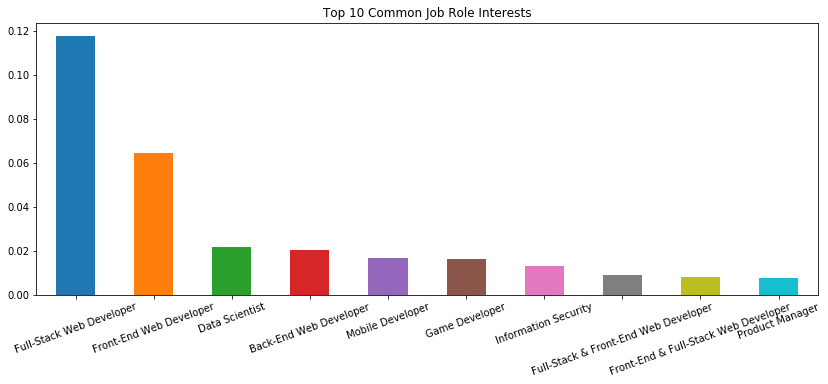

In [13]:
plt.figure()
JobRoleInterest_summary[:10].plot(kind = 'bar',figsize = (14,5))
plt.xticks(np.arange(0,10),('Full-Stack Web Developer', 'Front-End Web Developer',
       'Data Scientist', 'Back-End Web Developer', u'Mobile Developer',
       'Game Developer', 'Information Security',
       'Full-Stack & Front-End Web Developer',
       'Front-End & Full-Stack Web Developer',
       'Product Manager'), fontsize=10, rotation= 20)
plt.title('Top 10 Common Job Role Interests')
plt.show()

Next we want to find out how many people are interested in web or mobile subjects.

In [14]:
subjects = JobRoleInterest_summary.index.tolist()
web_mobile_subjects = {}
for s in subjects:
    if re.search('Web',s) or re.search('Mobile',s):
        web_mobile_subjects[s] = JobRoleInterest_summary.loc[s]

In [15]:
web_mobile_subjects_df = pd.DataFrame.from_dict(web_mobile_subjects,orient='index')

In [16]:
web_mobile_subjects_df.head()

,0
"Front-End Web Developer, Full-Stack Web Developer, Mobile Developer, User Experience Designer, Back-End Web Developer",0.000143
"Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer, Game Developer, Mobile Developer",0.000143
"Full-Stack Web Developer, Mobile Developer, Game Developer, Back-End Web Developer",0.000286
"Game Developer, Full-Stack Web Developer, Product Manager, Mobile Developer, User Experience Designer",0.000143
"User Experience Designer, Product Manager, Quality Assurance Engineer, DevOps / SysAdmin, Mobile Developer, Front-End Web Developer, Full-Stack Web Developer, Information Security, Back-End Web Developer",0.000143


In [17]:
web_mobile_subjects_df.sum()

0    0.862986
dtype: float64

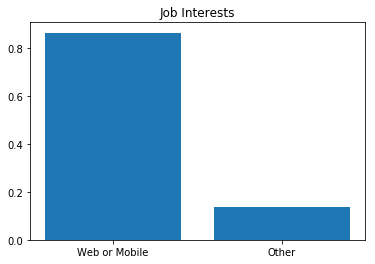

In [18]:
web_mobile_other = {'Web or Mobile': 0.862986, 'Other': 1-0.862986}
names = list(web_mobile_other.keys())
values = list(web_mobile_other.values())
plt.bar(range(2),values,tick_label=names)
plt.title('Job Interests')
plt.show()

It turns out that 86% people are interested in at least one of these two subjects.

## New Coders - Locations and Densities

We now want to find out where these new coders are located, and what arethe densities for each location. We'll work with the 'CountryLive' variable, which describes what country each participants lives in. We will:
- Drop all the rows where participants didn't answer what role they are interested in.
- Generate a frequncy table for the 'CountryLive' variable.

In [19]:
survey.shape

(18175, 59)

In [20]:
survey['JobRoleInterest'].isnull().sum()

11183

In [21]:
survey_jobrole = survey[survey['JobRoleInterest'].notnull()].copy()

In [22]:
survey_jobrole.shape

(6992, 59)

In [23]:
countrylive_summary = survey_jobrole['CountryLive'].value_counts()

In [24]:
countrylive_summary_percentage = survey_jobrole['CountryLive'].value_counts(normalize = True)

In [25]:
countrylive_summary_percentage.head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

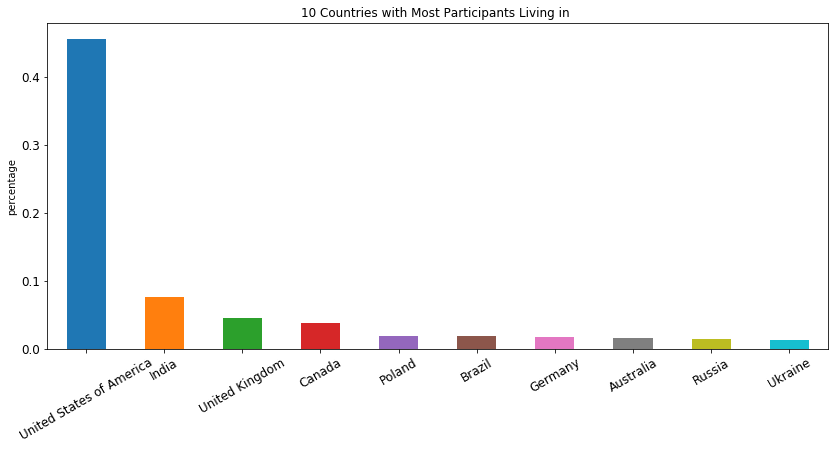

In [26]:
plt.figure()
countrylive_summary_percentage.head(10).plot(kind = 'bar', figsize = (14,6), fontsize = 12, rot = 30)
plt.ylabel('percentage')
plt.title('10 Countries with Most Participants Living in ')
plt.show()

Most new coders live in United States of America, and India, United Kindom and Canada are the next three countries with new coders live in.

## Spending Money for Learning

Nect we want to figure out how much money new coders are acturaaly willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremly unlikely to be profitable for us.

The 'MoneyForLearning' column describes the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we'are interestd in finding out how much money each student spends per month.

We will narrow down our analysis to only four countries: the US, India, the United Kingdom and Canada, since from analysis above, they are the coutries having the highest frequencies in our sample.

We will:
- Create a new column that describes the amount of money a student has spent per month.

In [27]:
survey_jobrole['MoneyPerMonth'] = survey_jobrole['MoneyForLearning']/ (survey_jobrole['MonthsProgramming'].replace(0,1))

In [28]:
survey_jobrole['MoneyPerMonth'].isnull().sum()/float(survey_jobrole.shape[0])

0.09653890160183067

There is no 'MoneyPerMonth' for about 10% data,and we will drop those data.

In [29]:
survey_money = survey_jobrole.dropna(subset = ['MoneyPerMonth']).copy()

In [30]:
survey_money.shape

(6317, 60)

We also want to remove rows that have null values in the 'CountryLive' column

In [31]:
survey_money = survey_money.dropna(subset=['CountryLive'])

In [32]:
survey_money.shape

(6212, 60)

In [33]:
MoneyPerMonth_by_Country = survey_money.groupby(['CountryLive']).mean()['MoneyPerMonth']

In [34]:
four_countries = ['United States of America','India','United Kingdom', 'Canada']
MoneyPerMonth_4Countries = MoneyPerMonth_by_Country[four_countries]
MoneyPerMonth_4Countries

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

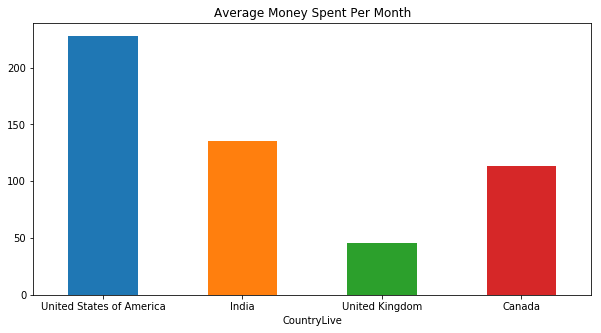

In [35]:
plt.figure()
MoneyPerMonth_4Countries.plot(kind = 'bar', figsize = (10,5), rot = 0)
plt.title('Average Money Spent Per Month')
plt.show()

## Dealing with Extreme Outliers

The result above for the United Kingdom and Canada are surprisingly low to the value for India. It might be that we don't have enoufh representative data, or we have some outliers. We will:
- generate box plots to visualize for each country the distribution of the variable that describes how much money each participant had spent per month.
- Eliminate the extreme outliers.
- Recompute average money a student spends each month in the four countries.

In [36]:
survey_money_4Countries = survey_money[survey_money['CountryLive'].isin(four_countries)]

In [37]:
import seaborn as sns

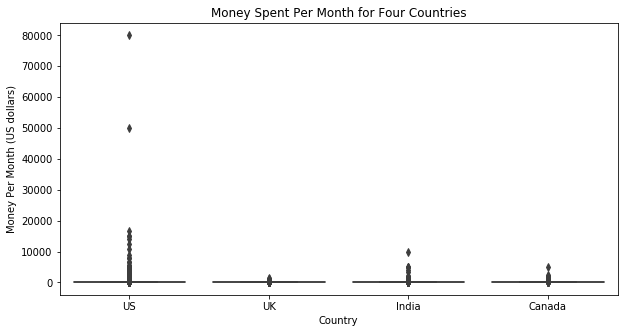

In [38]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = survey_money_4Countries)
plt.title('Money Spent Per Month for Four Countries')
plt.xlabel('Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

It seems that $50000 and above are too big values, so we will remove those.

In [39]:
survey_money_4Countries = survey_money_4Countries[survey_money_4Countries['MoneyPerMonth'] < 50000]

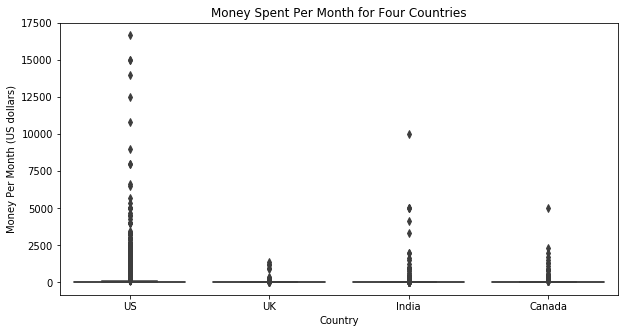

In [40]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = survey_money_4Countries)
plt.title('Money Spent Per Month for Four Countries')
plt.xlabel('Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

For India, we observe that values great than $2500 are outliers.

In [41]:
india_outliers = survey_money_4Countries[
    (survey_money_4Countries['CountryLive'] == 'India') &
    (survey_money_4Countries['MoneyPerMonth'] >= 2500)]

In [42]:
# Remove the outliers for India
survey_money_4Countries = survey_money_4Countries.drop(india_outliers.index)

For US, we observe that values great than $6000 are outliers.

In [43]:
us_outliers = survey_money_4Countries[
    (survey_money_4Countries['CountryLive'] == 'United States of America') &
    (survey_money_4Countries['MoneyPerMonth'] >= 6000)
]

In [44]:
us_outliers.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,...,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,StudentDebtOwe,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,15 to 29 minutes,United States of America,...,"User Experience Designer, Full-Stack Web Devel...",in an office with other developers,English,"single, never married",8000.0,1.0,bachelor's degree,Architecture,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,United States of America,...,"Front-End Web Developer, Mobile Developer, ...",in an office with other developers,English,"single, never married",13000.0,2.0,bachelor's degree,Anthropology,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,Less than 15 minutes,NaN,...,"Quality Assurance Engineer, DevOps / SysAdmi...",in an office with other developers,English,"single, never married",9000.0,0.0,"some college credit, no degree",NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,United States of America,...,"DevOps / SysAdmin, Front-End Web Developer, ...",no preference,English,married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,40000.0,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,United States of America,...,"Full-Stack Web Developer, Game Developer, Pr...",no preference,English,married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,45000.0,15000.000000


For Canada, there is an extreme outlier which is about $5000.

In [45]:
canada_outliers = survey_money_4Countries[
    (survey_money_4Countries['CountryLive'] =='Canada') &
    (survey_money_4Countries['MoneyPerMonth'] > 4500)
]

In [46]:
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,...,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,StudentDebtOwe,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,30 to 44 minutes,Canada,...,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,bachelor's degree,Finance,NaN,5000.0


For some outliers of US and Canada, the participant had been programming for no more than two months when he completed the survey. Such participants may have paid a large sum of money in the beginning to enroll in a bootcamp.

In [47]:
survey_money_4Countries = survey_money_4Countries.drop(us_outliers.index)
survey_money_4Countries = survey_money_4Countries.drop(canada_outliers.index)

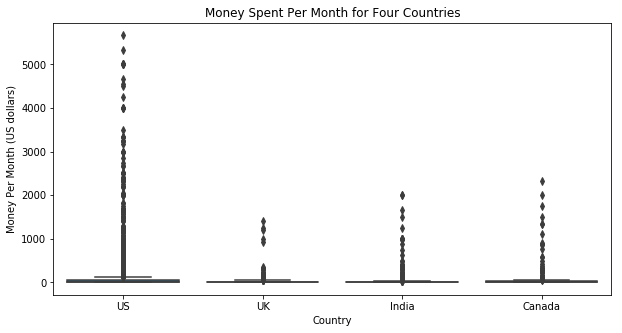

In [48]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = survey_money_4Countries)
plt.title('Money Spent Per Month for Four Countries')
plt.xlabel('Country')
plt.ylabel('Money Per Month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

In [49]:
survey_money_4Countries.groupby(['CountryLive']).mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

## Choosing the Two Best Markets to Advertise In

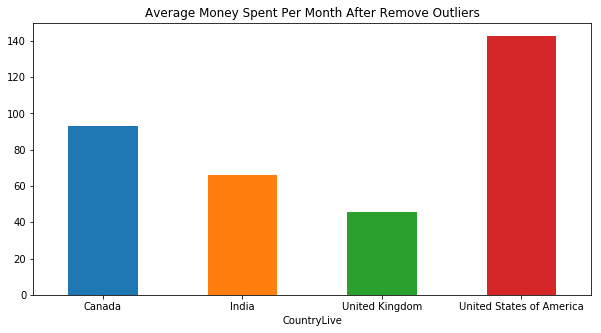

In [50]:
plt.figure()
survey_money_4Countries.groupby(['CountryLive']).mean()['MoneyPerMonth'].plot(kind = 'bar', figsize = (10,5), rot = 0)
plt.title('Average Money Spent Per Month After Remove Outliers')
plt.show()

From the above figure, we can see that Canada seems to be the best second choice because people there are willing to pay about $95 per month.

Text(0.5,1,'Percentage of Participants in each Country')

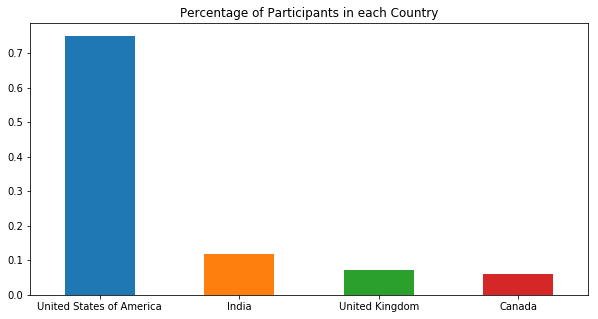

In [51]:
survey_money_4Countries['CountryLive'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,5), rot = 0)
plt.title('Percentage of Participants in each Country')

From this figure, we can see that India could be the second choice too since there are more people there want to participate.

Conclusion: we can see the the US is the best market to advertise in, the other two choices are Canada and India. We can not be sure which market is better, so maybe more discussions should be made at this point.